#Determines the Electronic charge density along Z axis.


path="" refers to the path of the dump file from which data is to be extracted

frames=------ number of frames during openmd execution

atomNumber=----------- total number of atomic sites during program execution

In [2]:
# extract information from dump file.


import numpy as num
import matplotlib.pyplot as plt
import pylab as lab
from scipy import constants
import pandas as pan
import scipy as sci
import sys
%matplotlib inline

In [3]:
#==================================================================================================================
folder='/home/hbhattar/afs/Hemanta/metals/DifferentSlabSameEField/6Layers.dump'
folderPath="/home/hbhattar/afs/Hemanta/metals/ChargeDiffLayers/Pt9/"
path=folder#Path+"Slab_9_layers_Zhou_KSmall.dump"; 
frames=100;              #total frames in dump file
atomNumber=192;         #total atoms in lattice


#====================================================================================================================


fileDump=open(path)  #dump file for info extraction
linesDump=fileDump.readlines()

processP="Wait"
processC="Wait"


#information storage matrix 
#posiiton and velocity storage
x=num.zeros((frames,atomNumber))
y=num.zeros((frames,atomNumber))
z=num.zeros((frames,atomNumber))
#fx=num.zeros((frames,atomNumber))
#fy=num.zeros((frames,atomNumber))
#fz=num.zeros((frames,atomNumber))
vx=num.zeros((frames,atomNumber))
vy=num.zeros((frames,atomNumber))
vz=num.zeros((frames,atomNumber))


#charge and velocity storage matrix
c=num.zeros((frames,atomNumber))
cv=num.zeros((frames,atomNumber))
ey=num.zeros((frames,atomNumber))
ex=num.zeros((frames,atomNumber))
ez=num.zeros((frames,atomNumber))
#frame count initilization
fCount=0
index=0  #index for the atoms
for line in linesDump:
    linesSplit=str.split(line)
    length=len(linesSplit)
    
    if(length!=0 and linesSplit[0]=="<StuntDoubles>" and processP=="Wait"):
        processP="Start"
        continue;
        
    elif(length!=0 and linesSplit[0]=="</StuntDoubles>" and processP=="Start"):
        processP="Wait"
        index=0
        continue;
        
    elif(length!=0 and linesSplit[0]=="<SiteData>" and processC=="Wait"):
        processC="Start"
        continue;
        
    elif(length!=0 and linesSplit[0]=="</SiteData>" and processC=="Start"):
        fCount=fCount+1
        index=0;
        processC="Wait"
        continue;
   
    elif(fCount>=frames):
        break;
        
    else:
        processP=processP;
        processC=processC;
        
        
    if (processP=="Start"):
        x[fCount][index]=float(linesSplit[2])
        y[fCount][index]=float(linesSplit[3])
        z[fCount][index]=float(linesSplit[4])
        vx[fCount][index]=float(linesSplit[5])
        vy[fCount][index]=float(linesSplit[6])
        vz[fCount][index]=float(linesSplit[7])
        #fx[fCount][index]=float(linesSplit[8])
        #fy[fCount][index]=float(linesSplit[9])
        #fz[fCount][index]=float(linesSplit[10])
        index=index+1
        
    if(processC=="Start"):
        c[fCount][index]=float(linesSplit[3])
        cv[fCount][index]=float(linesSplit[4])
        ez[fCount][index]=float(linesSplit[7])
        ey[fCount][index]=float(linesSplit[6])
        ex[fCount][index]=float(linesSplit[5])
        index=index+1
       

In [4]:
#determine the layers
a=num.sort(list(set(z[0,0:atomNumber-2])))
layer=[]
for var in a:
    layer.append(num.where(z[0]==var))
    


In [5]:
Ex=[]
Ey=[]
Ez=[]
charge=[]
framing=0
for items in range(a.size):
    Ex.append(sum(ex[framing][layer[items][0]])/float(layer[items][0].size))
    Ey.append(sum(ey[framing][layer[items][0]])/float(layer[items][0].size))
    Ez.append(sum(ez[framing][layer[items][0]])/float(layer[items][0].size))
    charge.append(sum(c[framing][layer[items][0]])/float(layer[items][0].size))
    
    
 

In [6]:
def chargeDen(r,param):
    r=num.array(r)
    if param=="Z":
        fe=2.336509
        re=2.771916
        lam=0.826967
        beta=3.775974
        expArg=beta*(1-r/float(re))
        denoArg=1+(r/float(re)-lam)**20
        fr=fe*num.divide(num.exp(expArg),(denoArg))
    elif param=="D":
        rho=pan.read_csv("Pt_u3.rho.dat",sep="\t",names=["r","rho"])
        RhoF=pan.DataFrame(rho)
        fr=sci.interp(r,RhoF.r,RhoF.rho)
    else:
        print("Invalid entry: Chooose Daw(D) or Zhou(Z)")
    
    return fr

def dist(R,xf,yf,zf):
    r=num.ones(R.size).reshape(R.shape)
    r[0,:]=xf*r[0,:]
    r[1,:]=yf*r[1,:]
    r[2,:]=zf*r[2,:]
    diff=R-r
    diff2=diff**2
    sumdiff2=num.sum(diff2,axis=0)
    
    return num.sqrt(sumdiff2)

def partialCharge(q):
    return 1-q/float(4)

def totalChargeDen(partial,chargeden):
    return(num.dot(partial,chargeden))

In [7]:
def chargeDen(r,param):
    r=num.array(r)
    if param=="Z":
        fe=0.647872
        re=3.499723
        lam=0.851753
        beta=4.516486
        expArg=beta*(1-r/float(re))
        denoArg=1+(r/float(re)-lam)**20
        fr=fe*num.divide(num.exp(expArg),(denoArg))
    elif param=="D":
        rho=pan.read_csv("Pt_u3.rho.dat",sep="\t",names=["r","rho"])
        RhoF=pan.DataFrame(rho)
        fr=sci.interp(r,RhoF.r,RhoF.rho)
    else:
        print("Invalid entry: Chooose Daw(D) or Zhou(Z)")
    
    return fr

def dist(R,xf,yf,zf):
    r=num.ones(R.size).reshape(R.shape)
    r[0,:]=xf*r[0,:]
    r[1,:]=yf*r[1,:]
    r[2,:]=zf*r[2,:]
    diff=R-r
    diff2=diff**2
    sumdiff2=num.sum(diff2,axis=0)
    
    return num.sqrt(sumdiff2)

def partialCharge(q):
    return 1-q/float(4)

def totalChargeDen(partial,chargeden):
    return(num.dot(partial,chargeden))



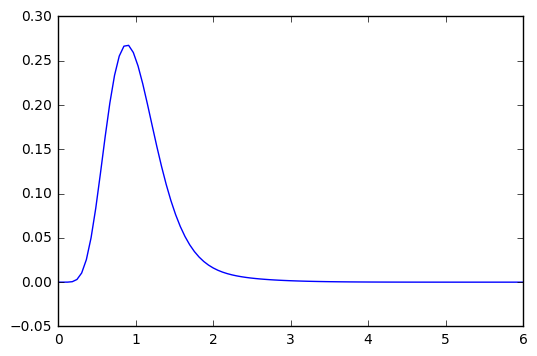

In [8]:
distance=num.linspace(0,6,100)
lab.plot(distance,chargeDen(distance,"D"))

In [44]:
c.shape

(100, 3600)

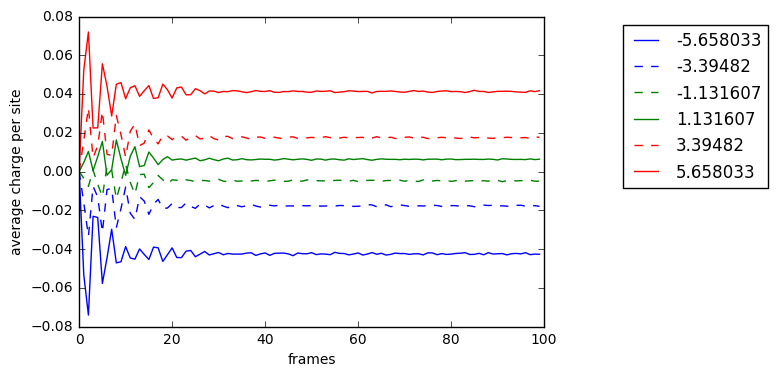

In [9]:
colors=['b','b--', 'g--','g','r--','r','c--','c','m--','m','y--','y'\
        , 'k--','k','b-.','g-.','r-.','c-.','m-.','y-.','k-.']
fig = plt.figure(1)
ax = fig.add_subplot(111)

for counter in range(len(a)):
    lab.plot(num.sum(c[:,layer[counter][0]],axis=1)/len(layer[counter][0]),colors[counter],label=a[counter])
    

handles, labels = ax.get_legend_handles_labels()
lab.xlabel("frames")
lab.ylabel("average charge per site")
lgd=lab.legend(bbox_to_anchor=(1.5,1),loc="upper right")
lab.savefig(folderPath+"chargeLayersDaw_Ksmall.eps",bbox_extra_artists=(lgd,), bbox_inches='tight')
lab.show()

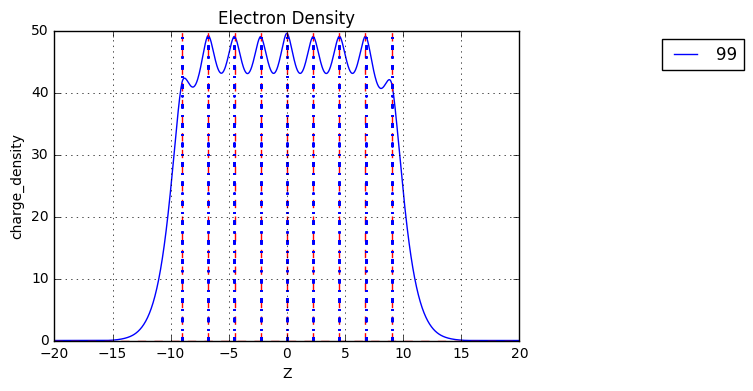

In [38]:
framing=[99]
paramSet="Z"
zlim=20



xx=num.linspace(-2,2,10)
yy=num.linspace(-2,2,10)
xycord=[[x0, y0] for x0 in xx for y0 in yy]
frameForAveraging=framing
AverageDensity=[]
for framing in frameForAveraging:
    R=num.array([x[framing,:-1],y[framing,:-1],z[framing,:-1]])
    allChargeDist=[]
    zz=num.linspace(-zlim,zlim,1000)
    for xy in xycord:
        chargedist=[]
        for var in zz:
            chargedist.append(totalChargeDen(partialCharge(c[framing,:-1]),\
                                             chargeDen(dist(R,xy[0],xy[1],var),paramSet)))
        allChargeDist.append(chargedist)
    allChargeDistMat=num.matrix(allChargeDist)
    averageChargeDistMat=num.sum(allChargeDist,axis=0)/float(len(xycord))
    AverageDensity.append(averageChargeDistMat)
FinalAverageDensity=num.sum(num.matrix(AverageDensity),axis=0)/float(len(frameForAveraging))

lab.plot(zz,averageChargeDistMat,label=str(framing))
for points in a:
    lab.axvline(points,linestyle="--",color="red")
lab.axhline(0,linestyle="--",color="red")
for var in z[framing]:
    lab.axvline(var,linestyle="-.")

lgd=lab.legend(bbox_to_anchor=(1.5,1),loc="upper right")
lab.grid()
lab.xlabel("Z")
lab.ylabel("charge_density")
lab.title("Electron Density")
lab.show()

In [181]:
#chargeDistE0=averageChargeDistMat

In [71]:
chargeDistE1=averageChargeDistMat

In [625]:
diff=chargeDistE1-chargeDistE0

In [46]:
a

array([-19.237311, -16.974098, -14.710885, -12.447672, -10.184459,
        -7.921246,  -5.658033,  -3.39482 ,  -1.131607,   1.131607,
         3.39482 ,   5.658033,   7.921246,  10.184459,  12.447672,
        14.710885,  16.974098,  19.237311])

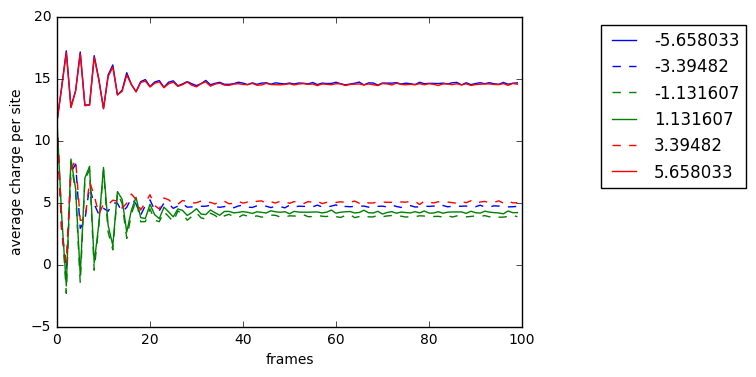

In [10]:
colors=['b','b--', 'g--','g','r--','r','c--','c','m--','m','y--','y'\
        , 'k--','k','b-.','g-.','r-.','c-.','m-.','y-.','k-.']
fig = plt.figure(1)
ax = fig.add_subplot(111)

for counter in range(len(a)):
    lab.plot(num.sum(ez[:,layer[counter][0]],axis=1)/len(layer[counter][0]),colors[counter],label=a[counter])
    

handles, labels = ax.get_legend_handles_labels()
lab.xlabel("frames")
lab.ylabel("average charge per site")
lgd=lab.legend(bbox_to_anchor=(1.5,1),loc="upper right")
lab.savefig(folderPath+"chargeLayersDaw_Ksmall.eps",bbox_extra_artists=(lgd,), bbox_inches='tight')
lab.show()

5